In [1]:
import hashlib # for grading purposes
import math
import numpy as np
import pandas as pd
import requests
import sqlalchemy
import ast
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

username = 'postgres'
password = '6WvG10BahbZvZvrneZKK'  # the password is not XXX by the way
host_name = 'containers-us-west-206.railway.app'
port = 7775
db_name = 'railway'
conn_str = 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host_name, port, db_name)
engine = sqlalchemy.create_engine(conn_str)
query = 'SELECT * FROM prediction;'
data_server = pd.read_sql_query(query, engine)

In [2]:
data_server.to_csv('data_server.csv', index=False)


In [3]:
data_server

,id,observation_id,observation,predicted_outcome,outcome
0,2,eeb891e3-3913-4590-82a9-dc23c212dceb,{'observation_id': 'eeb891e3-3913-4590-82a9-dc...,False,True
1,3,898d6606-c55b-4a54-9480-f967beaff1cf,{'observation_id': '898d6606-c55b-4a54-9480-f9...,True,False
2,4,3ff08b3c-c1fc-4c9f-97fe-470cf3a61cef,{'observation_id': '3ff08b3c-c1fc-4c9f-97fe-47...,True,False
3,5,73d7c589-7605-42ab-9c5c-d0fbb897adb0,{'observation_id': '73d7c589-7605-42ab-9c5c-d0...,False,False
4,6,1d276941-2dd7-4cc0-b14d-764ee8bcd966,{'observation_id': '1d276941-2dd7-4cc0-b14d-76...,True,False
...,...,...,...,...,...
4015,3953,dec81b01-b351-4030-b419-6044c91cd895,{'observation_id': 'dec81b01-b351-4030-b419-60...,False,False
4016,3969,9c7e363f-26df-4b8a-92cf-b3cbf70827cc,{'observation_id': '9c7e363f-26df-4b8a-92cf-b3...,True,False
4017,3985,b08e103a-4f94-48c6-974f-1b746dde4ca0,{'observation_id': 'b08e103a-4f94-48c6-974f-1b...,True,False
4018,4001,493b76ae-8e5e-498d-8a9d-68eeeb8d51de,{'observation_id': '493b76ae-8e5e-498d-8a9d-68...,True,False


In [5]:
data_server_list = data_server.observation.values
df = pd.DataFrame([eval(data.replace("nan", "None" )) for data in data_server_list])


In [6]:
df['Outcome'] = data_server['outcome']
df['Predicted outcome'] = data_server['predicted_outcome']

In [7]:
df.to_csv('test_data.csv', index=False)


In [26]:
data_server = data_server.loc[1:3312]

y_true = data_server['outcome']
y_pred = data_server['predicted_outcome']

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.25
Recall: 0.83
F1 Score: 0.38


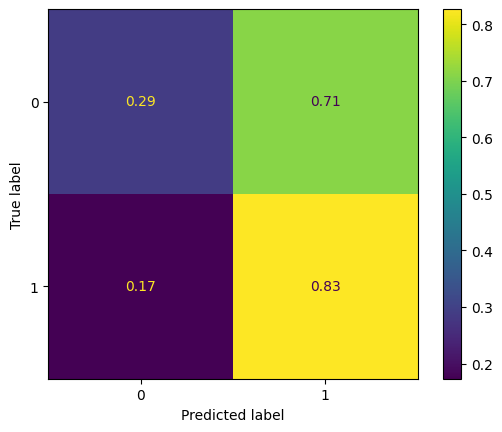

In [31]:
cm = confusion_matrix(y_true, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [33]:
cm

array([[0.29042264, 0.70957736],
       [0.17326057, 0.82673943]])

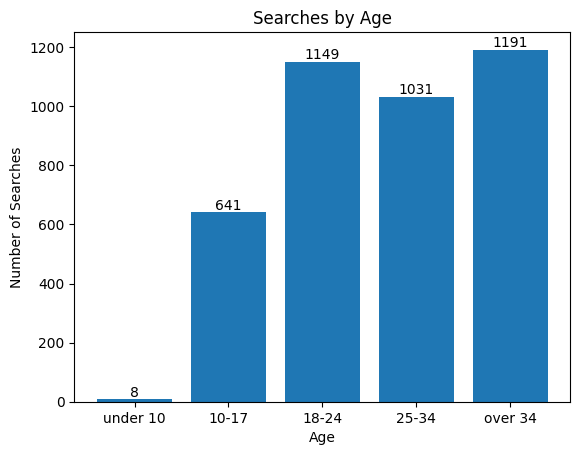

In [25]:
import matplotlib.pyplot as plt

# create a dictionary to map age ranges to numeric values for sorting
age_order = {'under 10': 0, '10-17': 1, '18-24': 2, '25-34': 3, 'over 34': 4}

# count the number of searches for each age
age_counts = df['Age range'].value_counts()

# sort the age counts by the order defined in the dictionary
age_counts = age_counts.sort_index(key=lambda x: x.map(age_order))

# create a bar plot
plt.bar(age_counts.index, age_counts.values)

# set the x-axis and y-axis labels
plt.xlabel('Age')
plt.ylabel('Number of Searches')

# set the title of the plot
plt.title('Searches by Age')

# add numbers on top of each bar
for i, v in enumerate(age_counts.values):
    plt.text(i, v+10, str(v), ha='center')

# show the plot
plt.show()

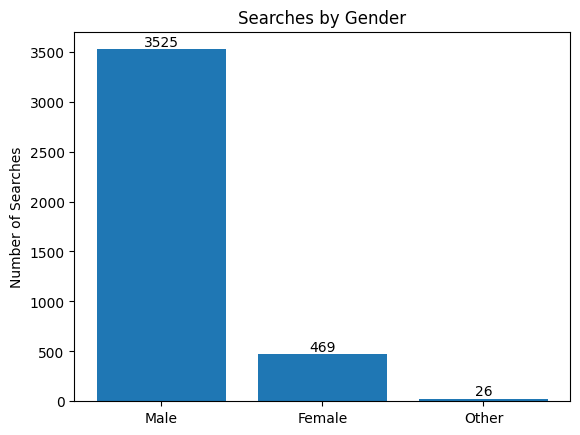

In [26]:
# count the number of searches for each gender
gender_counts = df['Gender'].value_counts()

# create a bar plot
plt.bar(gender_counts.index, gender_counts.values)

# set the x-axis and y-axis labels
#plt.xlabel('Gender')
plt.ylabel('Number of Searches')

# set the title of the plot
plt.title('Searches by Gender')

# add the number on top of each bar
for i, v in enumerate(gender_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# show the plot
plt.show()


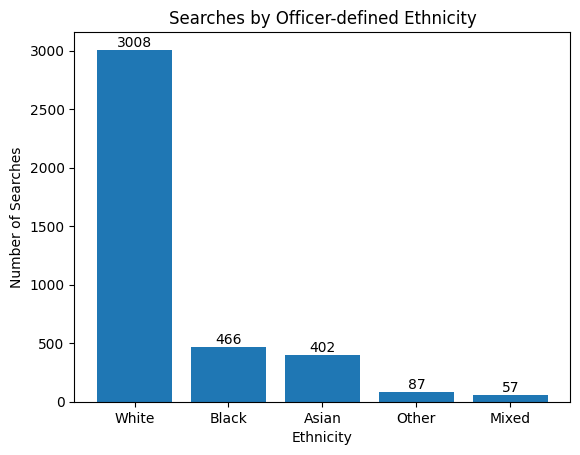

In [28]:
# count the number of searches for each ethnicity
ethnicity_counts = df['Officer-defined ethnicity'].value_counts()

# create a bar plot
plt.bar(ethnicity_counts.index, ethnicity_counts.values)

# set the x-axis and y-axis labels
plt.xlabel('Ethnicity')
plt.ylabel('Number of Searches')

# set the title of the plot
plt.title('Searches by Officer-defined Ethnicity')

# add the number on top of each bar
for i, v in enumerate(ethnicity_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# show the plot
plt.show()

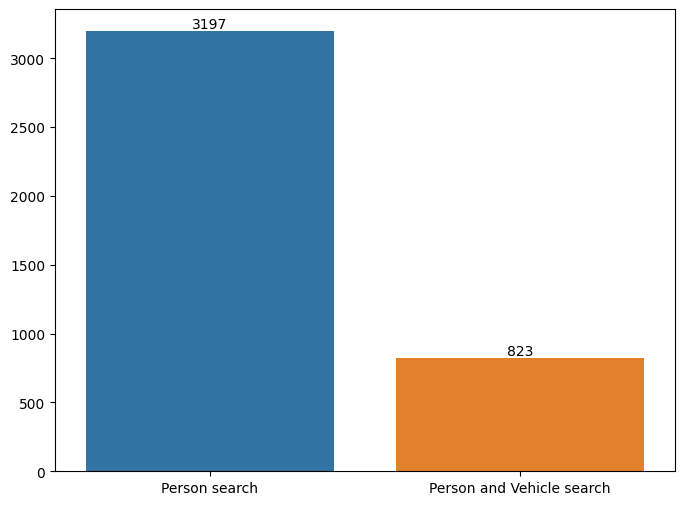

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the frequency of each unique value in the "Type" column
type_counts = df['Type'].value_counts()

# plot the count of each unique value
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values)

for i, v in enumerate(df['Type'].value_counts().values):
    plt.text(i, v+20, str(v), color='black', ha='center')

# display the plot
plt.show()


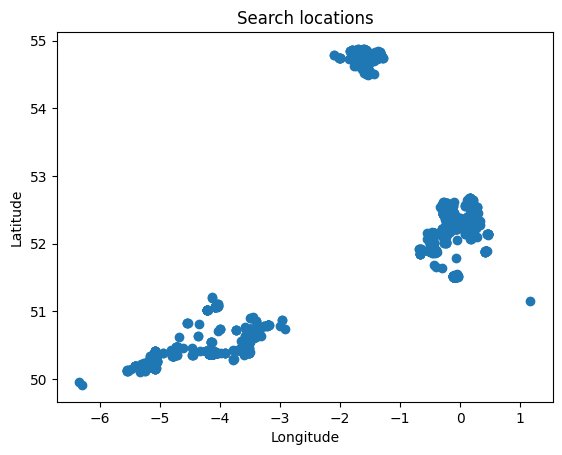

In [32]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Search locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


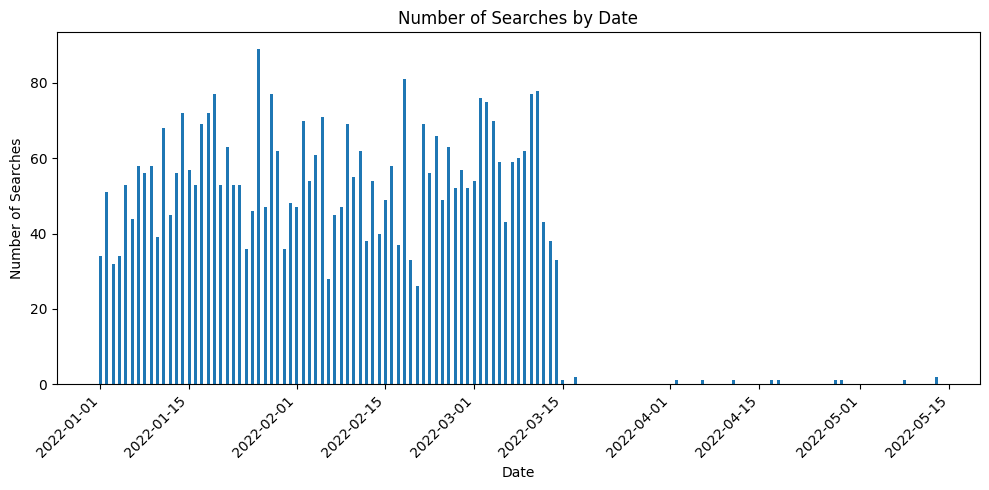

In [33]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set date as index and count number of searches per day
searches_by_date = df.set_index('Date').groupby(pd.Grouper(freq='D')).size()

# Create evenly distributed date range
date_range = pd.date_range(min(searches_by_date.index), max(searches_by_date.index), freq='D')

# Reindex searches_by_date with evenly distributed date range
searches_by_date = searches_by_date.reindex(date_range, fill_value=0)

# Create bar plot
plt.figure(figsize=(10,5))
plt.bar(searches_by_date.index, searches_by_date.values, width=0.5)
plt.xlabel('Date')
plt.ylabel('Number of Searches')
plt.title('Number of Searches by Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

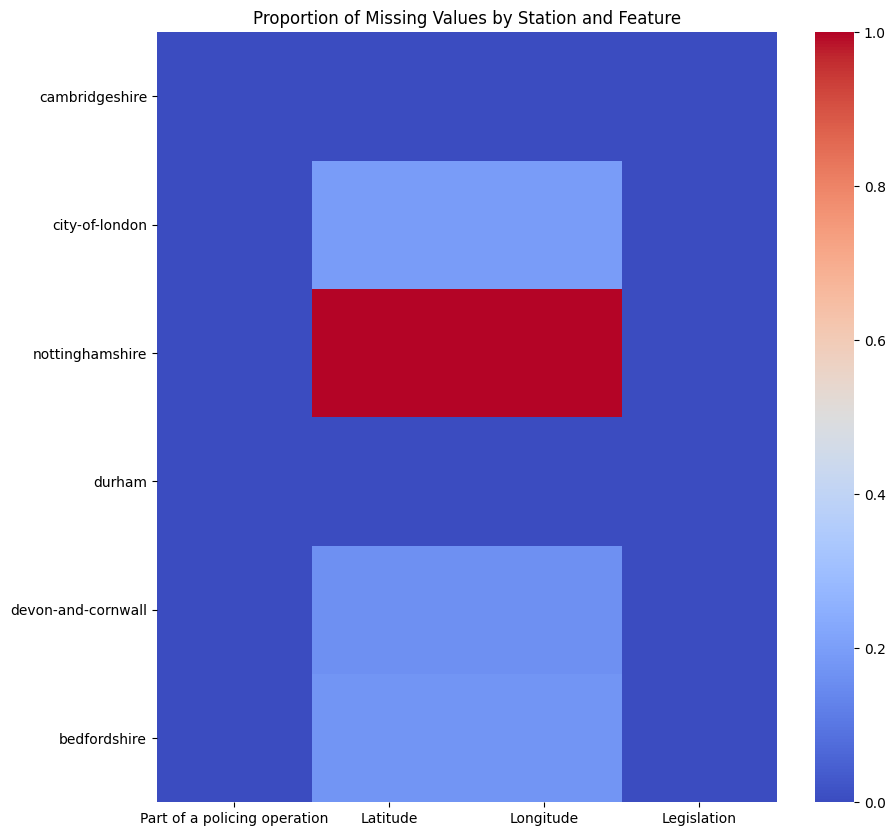

In [35]:
# Create a list of columns with missing values
missing_cols = ['Part of a policing operation', 'Latitude', 'Longitude', 'Legislation']

# Subset the dataframe to only columns with missing values
missing_df = df[missing_cols]

# Create a dataframe that shows the proportion of missing values for each station and feature
missing_prop = pd.DataFrame(index=df['station'].unique())
for col in missing_df.columns:
    missing_prop[col] = df.groupby('station')[col].apply(lambda x: x.isna().sum() / len(x))

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(missing_prop, cmap='coolwarm', ax=ax)
ax.set_title('Proportion of Missing Values by Station and Feature')
plt.show()

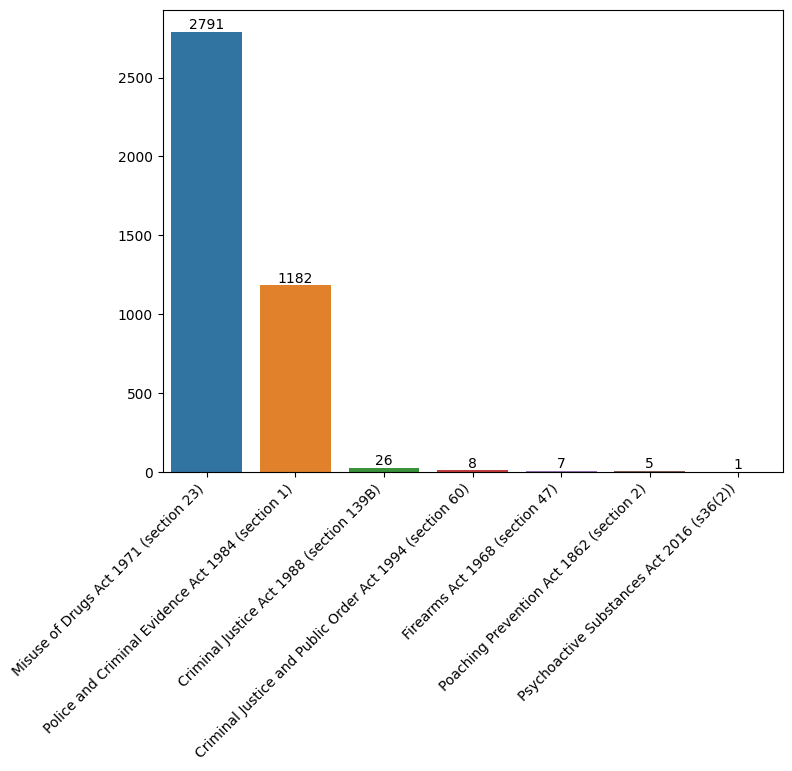

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the frequency of each unique value in the "Type" column
type_counts = df['Legislation'].value_counts()

# plot the count of each unique value
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values)

for i, v in enumerate(df['Legislation'].value_counts().values):
    plt.text(i, v+20, str(v), color='black', ha='center')
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()


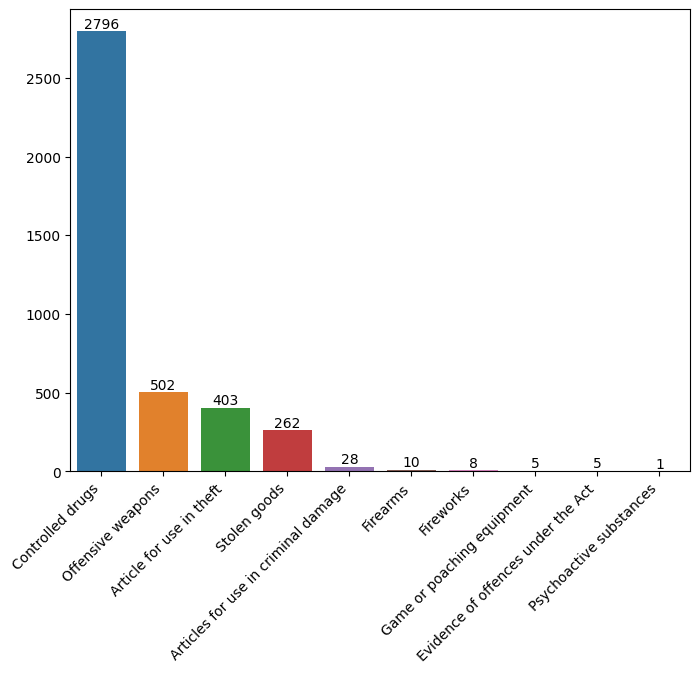

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the frequency of each unique value in the "Type" column
type_counts = df['Object of search'].value_counts()

# plot the count of each unique value
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values)

for i, v in enumerate(df['Object of search'].value_counts().values):
    plt.text(i, v+20, str(v), color='black', ha='center')
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()


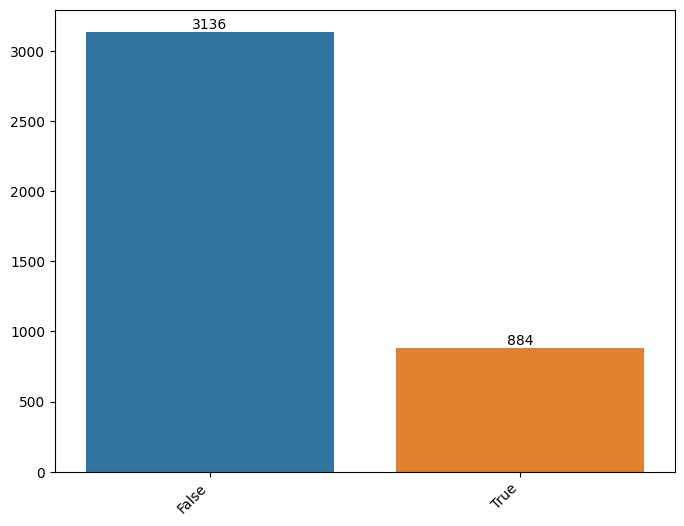

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# count the frequency of each unique value in the "Type" column
type_counts = df['Outcome'].value_counts()

# plot the count of each unique value
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values)

for i, v in enumerate(df['Outcome'].value_counts().values):
    plt.text(i, v+20, str(v), color='black', ha='center')
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()

In [15]:
def verify_no_discrimination(X_test, y_true, y_pred, sensitive_column='Age range', max_diff=0.05):
    """
    Verifies that no department has discrimination in between protected age ranges
    """
    
    departments = X_test['station'].unique()
    sensitive_classes = X_test[sensitive_column].unique()
    
    is_satisfied = True
    problematic_departments = []
    good_departments = []
    for department in departments:
        precisions = {}
        for sensitive_class in sensitive_classes:
            mask = (X_test[sensitive_column] == sensitive_class) & (X_test['station'] == department)
            if mask.sum():
                precisions[sensitive_class] = precision_score(y_true[mask], y_pred[mask], pos_label=1, zero_division=0)
                
        diff = np.max(list(precisions.values())) - np.min(list(precisions.values()))
        if diff > max_diff:
            is_satisfied = False
            problematic_departments.append((department, diff, precisions))
        else:
            good_departments.append((department, diff, precisions))

    return is_satisfied, problematic_departments, good_departments


In [17]:
X_test= df.copy()
y_test = df['Outcome']
y_pred = df['Predicted outcome']

In [19]:
print("\n\nGender")
is_satisfied, problematic_departments, good_deparments = verify_no_discrimination(X_test, y_test, y_pred, sensitive_column='Gender')
for i in range(0,1):
    if not is_satisfied:
        print("Requirement failed 😢")
        print("Num problematic departments: {}".format(len(problematic_departments)))
        print("Num good departments: {}".format(len(good_deparments)))

        print("avg diff:", np.mean([p[1] for p in problematic_departments]))


    print("\nEthnicity")
    is_satisfied, problematic_departments, good_deparments = verify_no_discrimination(
        X_test, y_test, y_pred, sensitive_column='Officer-defined ethnicity')

    if not is_satisfied:
        print("Requirement failed 😢")
        print("Num problematic departments: {}".format(len(problematic_departments)))
        print("Num good departments: {}".format(len(good_deparments)))

        print("avg diff:", np.mean([p[1] for p in problematic_departments]))
    else:
        print("Requirement satisfied! 🚀")
        
        
        print("\n age ")
    is_satisfied, problematic_departments, good_deparments = verify_no_discrimination(
        X_test, y_test, y_pred)

    if not is_satisfied:
        print("Requirement failed 😢")
        print("Num problematic departments: {}".format(len(problematic_departments)))
        print("Num good departments: {}".format(len(good_deparments)))

        print("avg diff:", np.mean([p[1] for p in problematic_departments]))
    else:
        print("Requirement satisfied! 🚀")

    print("Departments analysed: {}".format(len(problematic_departments) + len(good_deparments)))



Gender
Requirement failed 😢
Num problematic departments: 4
Num good departments: 2
avg diff: 0.10657744057099384

Ethnicity
Requirement failed 😢
Num problematic departments: 6
Num good departments: 0
avg diff: 0.3531374152788202
Requirement failed 😢
Num problematic departments: 6
Num good departments: 0
avg diff: 0.21042440758386208
Departments analysed: 6


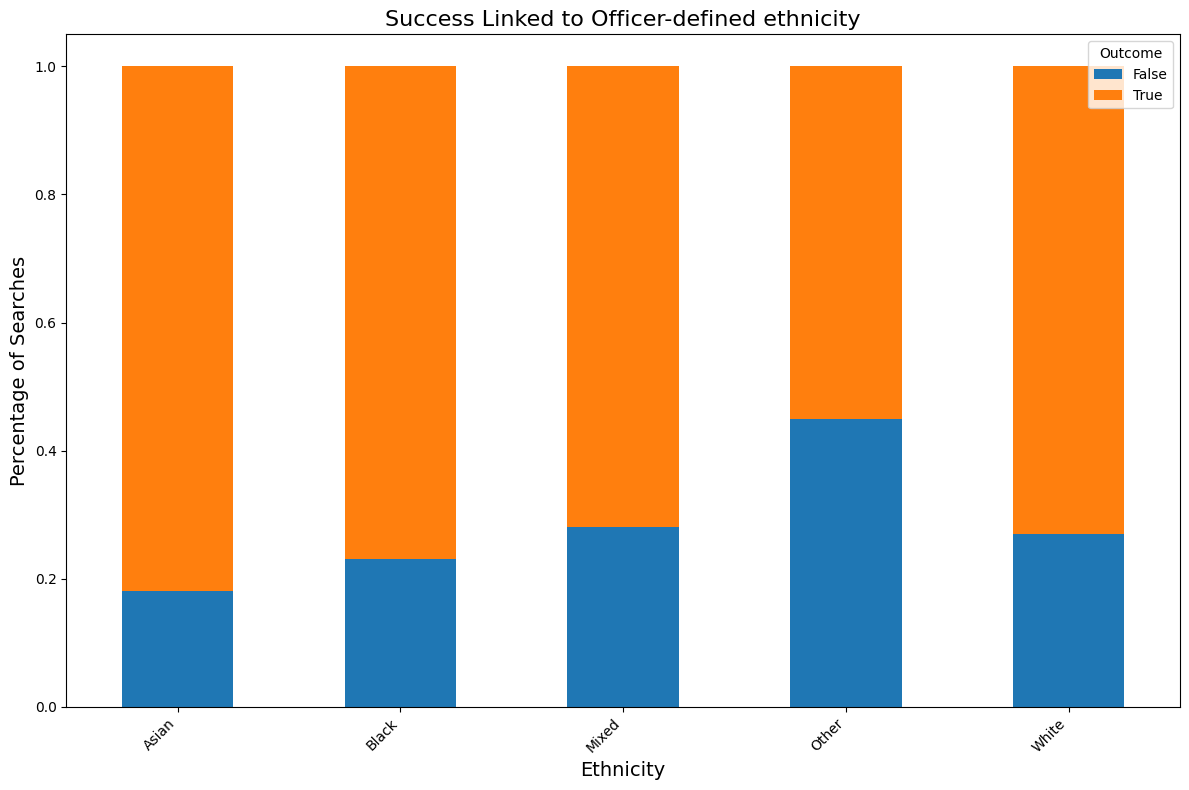

In [20]:
# Set a threshold for minimum number of searches per station and ethnicity
threshold = 30
data = df.copy()
# Get the counts of each ethnicity at each station
counts = data.groupby(['station', 'Officer-defined ethnicity','Gender']).size().reset_index(name='counts')
counts =  counts[counts["counts"] > threshold]

data = data.merge(counts[['station', 'Officer-defined ethnicity',"Gender"]], on=['station', 'Officer-defined ethnicity',"Gender"])

# Subset the dataframe to only include the columns of interest
ethnicity_outcome_df = data[['Officer-defined ethnicity', 'Predicted outcome']]

# Group the dataframe by ethnicity and outcome and calculate the count
ethnicity_outcome_count = ethnicity_outcome_df.groupby(['Officer-defined ethnicity', 'Predicted outcome']).size().reset_index(name='Count')

# Pivot the dataframe to have ethnicity as rows, outcome as columns, and count as values
ethnicity_outcome_pivot = ethnicity_outcome_count.pivot(index='Officer-defined ethnicity', columns='Predicted outcome', values='Count').fillna(0)

# Calculate the percentage of outcomes for each ethnicity
ethnicity_outcome_pct = ethnicity_outcome_pivot.div(ethnicity_outcome_pivot.sum(axis=1), axis=0).round(2)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ethnicity_outcome_pct.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Success Linked to Officer-defined ethnicity', fontsize=16)
ax.set_xlabel('Ethnicity', fontsize=14)
ax.set_ylabel('Percentage of Searches', fontsize=14)
ax.legend(title='Outcome', loc='upper right')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

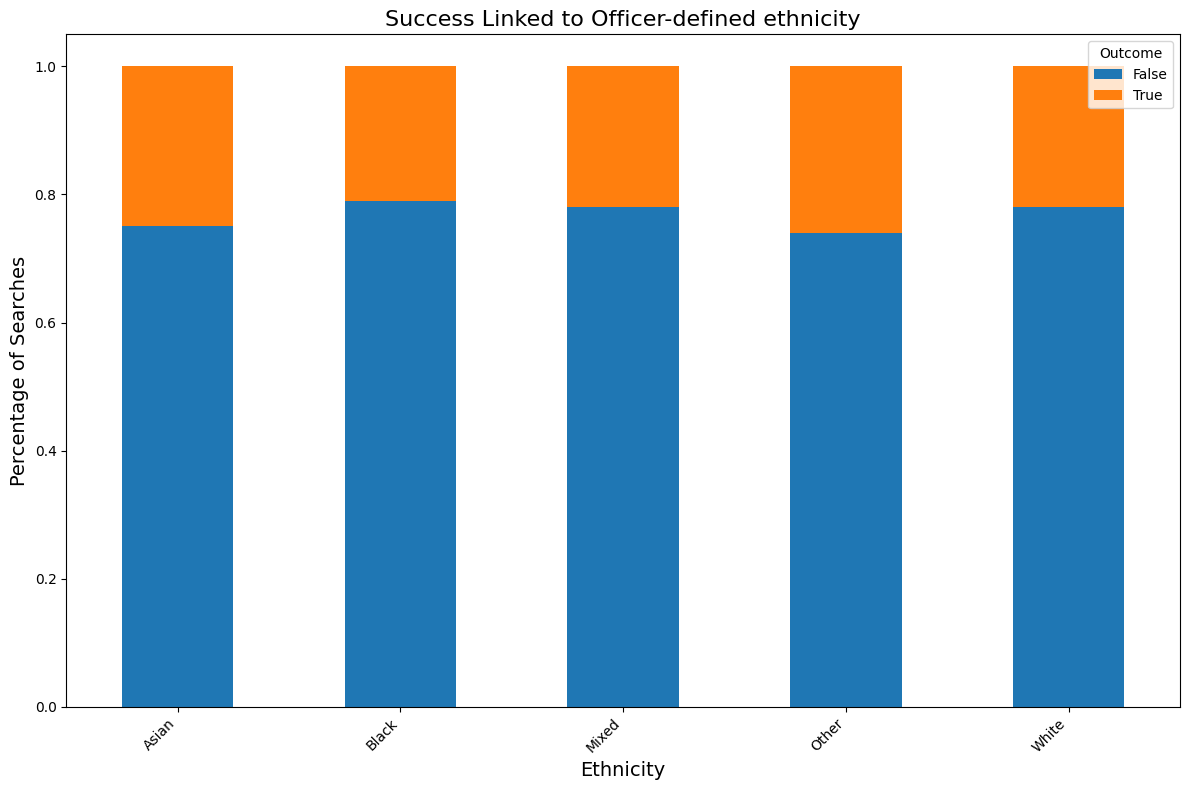

In [21]:
# Set a threshold for minimum number of searches per station and ethnicity
threshold = 30
data = df.copy()
# Get the counts of each ethnicity at each station
counts = data.groupby(['station', 'Officer-defined ethnicity','Gender']).size().reset_index(name='counts')
counts =  counts[counts["counts"] > threshold]

data = data.merge(counts[['station', 'Officer-defined ethnicity',"Gender"]], on=['station', 'Officer-defined ethnicity',"Gender"])

# Subset the dataframe to only include the columns of interest
ethnicity_outcome_df = data[['Officer-defined ethnicity', 'Outcome']]

# Group the dataframe by ethnicity and outcome and calculate the count
ethnicity_outcome_count = ethnicity_outcome_df.groupby(['Officer-defined ethnicity', 'Outcome']).size().reset_index(name='Count')

# Pivot the dataframe to have ethnicity as rows, outcome as columns, and count as values
ethnicity_outcome_pivot = ethnicity_outcome_count.pivot(index='Officer-defined ethnicity', columns='Outcome', values='Count').fillna(0)

# Calculate the percentage of outcomes for each ethnicity
ethnicity_outcome_pct = ethnicity_outcome_pivot.div(ethnicity_outcome_pivot.sum(axis=1), axis=0).round(2)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ethnicity_outcome_pct.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Success Linked to Officer-defined ethnicity', fontsize=16)
ax.set_xlabel('Ethnicity', fontsize=14)
ax.set_ylabel('Percentage of Searches', fontsize=14)
ax.legend(title='Outcome', loc='upper right')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()